## Algoritmo de clasificacion para predecir e identificar el grado de afinidad en carreras profesionales

Claudia Alejandra Fajardo Beltran

Importacion de librerias

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline
import unicodedata
import plotly.express as px
from _plotly_future_ import v4_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly import tools
from plotly.subplots import make_subplots
import scipy as sp
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [10]:
import pandas as pd
import numpy as np
pd.__version__

'1.4.4'

## Importacion del dataset

In [11]:
url = 'https://raw.githubusercontent.com/AlejandrafajardGithub/TFM/main/DATASETENCUESTA.csv'
data = pd.read_table(url, sep=';', encoding='latin-1')

In [12]:
data.shape

(1117, 60)

In [13]:
data

,Estudiante,Edad,Sexo,Carrera a la que esta matriculada actualmente,Semestre en el que se encuentra actualmente matriculado,¿Tiene hijos?,¿Recibe algún tipo de ayuda económica del gobierno?,¿Tú situación económica Influyo en la carrera escogida?,"En promedio, ¿Cuántas horas a la semana dedicas a la preparación de tus clases y/o actividades académicas?",¿Presenta alguna enfermedad o discapacidad que requiera cuidado especial?,...,¿Crees que es mejor trabajar individualmente que en equipo?,¿Te gustaría realizar investigaciones relacionadas a tu carrera?,"¿Te interesa saber cómo funcionan aparatos que usas a diario como el celular, la televisión o la computadora?",¿Has considerado especializarte o realizar una maestría en una linea de interés de tu carrera ?,Cuando tienes una meta definida ¿te esfuerzas por lograrla?,"En 2 años, ¿te ves ejerciendo la profesión escogida?",¿Procuras la seguridad en tu lugar de trabajo?,"¿Recibe algún apoyo económico por parte de sus padres, un familiar u otra persona para pagar sus estudios?",¿Organizas bien tu dinero?,¿Pasarías varias horas leyendo algún libro de tu interés?
0,Lizeth Johanna Leguizamo Diaz,30,Femenino,Administración de empresas,6to Semestre,Sí,No,Sí,De 1 a 2 horas,No,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,No
1,Lina Maria Rubiano Bacca,28,Femenino,Contaduría publica,6to Semestre,No,No,Sí,De 2 a 4 horas,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,No,No,Sí
2,Erika Tatiana Guevara Orozco,24,Femenino,Contaduría publica,9no Semestre,No,No,No,De 4 horas o mas,No,...,No,No,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
3,Danna Katherin Ramirez Rico,17,Femenino,Seguridad y salud en el trabajo,3er Semestre,No,No,Sí,De 4 horas o mas,No,...,No,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,Sí
4,Julián David Mora Rivera,22,Masculino,Administración de empresas,5to Semesstre,No,No,Sí,De 4 horas o mas,No,...,No,Sí,Sí,No,Sí,No,Sí,No,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Edisson Tellez Hernandez,34,Masculino,Administración de empresas,7mo Semestre,Sí,No,Sí,De 4 horas o mas,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1113,Aurora Melissa Cruz Muñoz,34,Femenino,Administración de empresas,3er Semestre,Sí,No,Sí,De 4 horas o mas,No,...,Sí,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1114,Derly Javiana Gonzalez Gallego,25,Femenino,Administración de empresas,8vo semestre,No,No,No,De 2 a 4 horas,No,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
1115,Claudia Marcela Vasquez Quiroga,43,Femenino,Contaduría publica,2do Semestre,Sí,No,Sí,De 4 horas o mas,Sí,...,No,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí


## Renombrar columnas

Se renombran los nombres de las columnas para mayor facilidad en el tratamiento de datos.

In [14]:
data.columns

Index(['Estudiante', 'Edad', 'Sexo',
       'Carrera a la que esta matriculada actualmente ',
       ' Semestre en el que se encuentra actualmente matriculado',
       ' ¿Tiene hijos?', '¿Recibe algún tipo de ayuda económica del gobierno?',
       ' ¿Tú situación económica Influyo en la  carrera escogida?  ',
       ' En promedio, ¿Cuántas horas a la semana dedicas a la preparación de tus clases y/o actividades académicas?',
       ' ¿Presenta alguna enfermedad o discapacidad que requiera cuidado especial?',
       'En que estrato socioeconómico se encuentra su vivienda',
       ' ¿En su viviendo cuenta con medios de apoyo para estudiar como: espacio para estudiar_ internet_computador entre otros?',
       '¿Es usted el primer integrante de su familia en acceder a educación superior?',
       ' ¿Consideras que en tu entorno se facilita hábitos de estudio adecuados?',
       ' ¿La carrera que cursa actualmente es la que quería estudiar?',
       ' ¿Un familiar, amigo o conocido tuvo inf

In [15]:
datos = data.rename(columns={'Edad':'0','Sexo':'1', 
        'Carrera a la que esta matriculada actualmente ':'2',
        ' Semestre en el que se encuentra actualmente matriculado':'3',
      ' ¿Tiene hijos?':'4',
        '¿Recibe algún tipo de ayuda económica del gobierno?':'5',
       ' ¿Tú situación económica Influyo en la  carrera escogida?  ':'6',
       ' En promedio, ¿Cuántas horas a la semana dedicas a la preparación de tus clases y/o actividades académicas?':'7',
       ' ¿Presenta alguna enfermedad o discapacidad que requiera cuidado especial?':'8',
       'En que estrato socioeconómico se encuentra su vivienda':'9',
       ' ¿En su viviendo cuenta con medios de apoyo para estudiar como: espacio para estudiar_ internet_computador entre otros?':'10',
       '¿Es usted el primer integrante de su familia en acceder a educación superior?':'11',
       ' ¿Consideras que en tu entorno se facilita hábitos de estudio adecuados?':'12',
       ' ¿La carrera que cursa actualmente es la que quería estudiar?':'13',
       ' ¿Un familiar, amigo o conocido tuvo influencia en la elección de carrera?':'14',
       ' ¿Conoce y tiene claro cuál será su campo de acción al momento de graduarse?':'15',
       '¿En el momento previo a ingresar a la universidad, usted recibió orientación vocacional?':'16',
       ' ¿Ha cursado otra carrera anteriormente?':'17',
       ' Si ha cursado otra carrera anteriormente, ¿obtuvo el título?':'18',
       '¿Consideraría retirarse de la carrera que cursa actualmente?':'19',
       '¿Usted se identifica con el perfil requerido para su carrera?':'20',
       ' ¿Considera que la relación con sus compañeros y docentes es buena?':'21',
       ' ¿Estás satisfecho con los profesores y sus métodos de enseñanza?':'22',
       ' ¿Cuántas alimentos consume al dia?':'23',
       ' ¿Asistes con frecuencia a las clases de las asignaturas matriculadas?':'24',
       ' ¿Ha interrumpido o aplazado sus estudios?':'25',
       'A parte de los libros que debes leer en la carrera  ¿con qué frecuencia lees?':'26',
       ' ¿Te atrae armar rompecabezas o puzzles?':'27',
       '¿Puedes establecer la diferencia conceptual entre macroeconomía y microeconomía?':'28',
       ' ¿Se encuentra trabajando actualmente?':'29',
       '¿Convences fácilmente a otras personas sobre la validez de tus argumentos?':'30',
       ' ¿Cuándo tienes que resolver algún problema matemático perseveras hasta encontrar la solución?':'31',
       ' ¿Si te convocara tu club preferido para planificar, organizar y dirigir un campo de deportes, aceptarías?':'32',
       ' ¿Planificas detalladamente tus trabajos antes de empezar?':'33',
       ' ¿Entablas una relación casi personal con tu computadora?':'34',
       '¿Estarías dispuesto a renunciar al ocio por tu trabajo?':'35',
       ' Cuando no consigues algo, ¿eres capaz de volver a empezar hasta que lo consigues?':'36',
       '¿Te planificas bien tus horarios?':'37',
       ' ¿Te gustaría aprender a fabricar y reparar máquinas?':'38',
       ' ¿Te resulta fácil coordinar un grupo de trabajo?':'39',
       ' ¿Te sentirías bien desempeñando un puesto de director comercial?':'40',
       ' Ante una frustración siempre opones un pensamiento positivo':'41',
       '¿Te dedicarías a socorrer a personas accidentadas en el lugar de trabajo?':'42',
       ' ¿Ayudas habitualmente a los no videntes a cruzar la calle?':'43',
       '¿Crees que tus ideas son importantes y haces lo posible para ponerlas en práctica?':'44',
       '¿Consideras que la salud pública debe ser prioritaria y gratuita?':'45',
       ' Si tienes que trabajar en equipo ¿prefieres el rol de coordinador?':'46',
       '¿Trabajar con objetos te resulta más gratificante qué trabajar con personas?':'47',
       '¿Te resultaría gratificante ser asesor contable en una empresa de reconocido prestigio?':'48',
       '¿Crees que es mejor trabajar individualmente que en equipo?':'49',
       ' ¿Te gustaría realizar investigaciones relacionadas a tu carrera?':'50',
       '¿Te interesa saber cómo funcionan aparatos que usas a diario como el celular, la televisión o la computadora?':'51',
       ' ¿Has considerado especializarte o realizar una maestría en una linea de interés de tu carrera ? ':'52',
       'Cuando tienes una meta definida ¿te esfuerzas por lograrla?':'53',
       'En 2 años, ¿te ves ejerciendo la profesión escogida?':'54',
       ' ¿Procuras la seguridad en tu lugar de trabajo?':'55',
       ' ¿Recibe algún apoyo económico por parte de sus padres, un familiar u otra persona para pagar sus estudios? ':'56',
       ' ¿Organizas bien tu dinero?':'57',
       '¿Pasarías varias horas leyendo algún libro de tu interés?':'58'})
datos

,Estudiante,0,1,2,3,4,5,6,7,8,...,49,50,51,52,53,54,55,56,57,58
0,Lizeth Johanna Leguizamo Diaz,30,Femenino,Administración de empresas,6to Semestre,Sí,No,Sí,De 1 a 2 horas,No,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,No
1,Lina Maria Rubiano Bacca,28,Femenino,Contaduría publica,6to Semestre,No,No,Sí,De 2 a 4 horas,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,No,No,Sí
2,Erika Tatiana Guevara Orozco,24,Femenino,Contaduría publica,9no Semestre,No,No,No,De 4 horas o mas,No,...,No,No,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
3,Danna Katherin Ramirez Rico,17,Femenino,Seguridad y salud en el trabajo,3er Semestre,No,No,Sí,De 4 horas o mas,No,...,No,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,Sí
4,Julián David Mora Rivera,22,Masculino,Administración de empresas,5to Semesstre,No,No,Sí,De 4 horas o mas,No,...,No,Sí,Sí,No,Sí,No,Sí,No,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Edisson Tellez Hernandez,34,Masculino,Administración de empresas,7mo Semestre,Sí,No,Sí,De 4 horas o mas,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1113,Aurora Melissa Cruz Muñoz,34,Femenino,Administración de empresas,3er Semestre,Sí,No,Sí,De 4 horas o mas,No,...,Sí,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1114,Derly Javiana Gonzalez Gallego,25,Femenino,Administración de empresas,8vo semestre,No,No,No,De 2 a 4 horas,No,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
1115,Claudia Marcela Vasquez Quiroga,43,Femenino,Contaduría publica,2do Semestre,Sí,No,Sí,De 4 horas o mas,Sí,...,No,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí


In [16]:
datos.columns

Index(['Estudiante', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58'],
      dtype='object')

In [18]:
nuevosdatos = datos.drop(['Estudiante','0'], axis=1)

In [19]:
nuevosdatos

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,Femenino,Administración de empresas,6to Semestre,Sí,No,Sí,De 1 a 2 horas,No,Estrato 1,Sí,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,No
1,Femenino,Contaduría publica,6to Semestre,No,No,Sí,De 2 a 4 horas,No,Estrato 2,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,No,No,Sí
2,Femenino,Contaduría publica,9no Semestre,No,No,No,De 4 horas o mas,No,Estrato 3,Sí,...,No,No,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
3,Femenino,Seguridad y salud en el trabajo,3er Semestre,No,No,Sí,De 4 horas o mas,No,Estrato 2,Sí,...,No,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,Sí
4,Masculino,Administración de empresas,5to Semesstre,No,No,Sí,De 4 horas o mas,No,Estrato 2,Sí,...,No,Sí,Sí,No,Sí,No,Sí,No,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Masculino,Administración de empresas,7mo Semestre,Sí,No,Sí,De 4 horas o mas,No,Estrato 1,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1113,Femenino,Administración de empresas,3er Semestre,Sí,No,Sí,De 4 horas o mas,No,Estrato 3,Sí,...,Sí,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1114,Femenino,Administración de empresas,8vo semestre,No,No,No,De 2 a 4 horas,No,Estrato 2,No,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
1115,Femenino,Contaduría publica,2do Semestre,Sí,No,Sí,De 4 horas o mas,Sí,Estrato 3,Sí,...,No,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí


## Tipo de datos

Se analizan el tipo de variables de cada columna.

In [20]:
nuevosdatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       1117 non-null   object
 1   2       1117 non-null   object
 2   3       1115 non-null   object
 3   4       1117 non-null   object
 4   5       1117 non-null   object
 5   6       1117 non-null   object
 6   7       1117 non-null   object
 7   8       1117 non-null   object
 8   9       1117 non-null   object
 9   10      1117 non-null   object
 10  11      1117 non-null   object
 11  12      1117 non-null   object
 12  13      1117 non-null   object
 13  14      1117 non-null   object
 14  15      1117 non-null   object
 15  16      1117 non-null   object
 16  17      1117 non-null   object
 17  18      1117 non-null   object
 18  19      1117 non-null   object
 19  20      1117 non-null   object
 20  21      1117 non-null   object
 21  22      1117 non-null   object
 22  23      1117 non-null   

Se realizara un cambio en el tipo de variables de objeto a categoricas.

In [21]:
nuevosdatos['7'] = nuevosdatos['7'].astype('category')
nuevosdatos['9'] = nuevosdatos['9'].astype('category')
nuevosdatos['2'] = nuevosdatos['2'].astype('category')
nuevosdatos['23'] = nuevosdatos['23'].astype('category')
nuevosdatos['24'] = nuevosdatos['24'].astype('category')

In [22]:
nuevosdatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   1       1117 non-null   object  
 1   2       1117 non-null   category
 2   3       1115 non-null   object  
 3   4       1117 non-null   object  
 4   5       1117 non-null   object  
 5   6       1117 non-null   object  
 6   7       1117 non-null   category
 7   8       1117 non-null   object  
 8   9       1117 non-null   category
 9   10      1117 non-null   object  
 10  11      1117 non-null   object  
 11  12      1117 non-null   object  
 12  13      1117 non-null   object  
 13  14      1117 non-null   object  
 14  15      1117 non-null   object  
 15  16      1117 non-null   object  
 16  17      1117 non-null   object  
 17  18      1117 non-null   object  
 18  19      1117 non-null   object  
 19  20      1117 non-null   object  
 20  21      1117 non-null   object  
 21  22      1117 n

## Datos nulos

Se presentan datos nulos en 2 de las columnas "3" y "29" lo cuales seran eliminados.

In [23]:
nuevosdatos = nuevosdatos.replace(r'^\s*$', np.nan, regex=True)

In [24]:
DatosF = nuevosdatos.dropna()
DatosF

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,Femenino,Administración de empresas,6to Semestre,Sí,No,Sí,De 1 a 2 horas,No,Estrato 1,Sí,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,No
1,Femenino,Contaduría publica,6to Semestre,No,No,Sí,De 2 a 4 horas,No,Estrato 2,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,No,No,Sí
2,Femenino,Contaduría publica,9no Semestre,No,No,No,De 4 horas o mas,No,Estrato 3,Sí,...,No,No,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
3,Femenino,Seguridad y salud en el trabajo,3er Semestre,No,No,Sí,De 4 horas o mas,No,Estrato 2,Sí,...,No,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,Sí
4,Masculino,Administración de empresas,5to Semesstre,No,No,Sí,De 4 horas o mas,No,Estrato 2,Sí,...,No,Sí,Sí,No,Sí,No,Sí,No,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Masculino,Administración de empresas,7mo Semestre,Sí,No,Sí,De 4 horas o mas,No,Estrato 1,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1113,Femenino,Administración de empresas,3er Semestre,Sí,No,Sí,De 4 horas o mas,No,Estrato 3,Sí,...,Sí,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1114,Femenino,Administración de empresas,8vo semestre,No,No,No,De 2 a 4 horas,No,Estrato 2,No,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
1115,Femenino,Contaduría publica,2do Semestre,Sí,No,Sí,De 4 horas o mas,Sí,Estrato 3,Sí,...,No,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí


In [25]:
DatosF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1116
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   1       1107 non-null   object  
 1   2       1107 non-null   category
 2   3       1107 non-null   object  
 3   4       1107 non-null   object  
 4   5       1107 non-null   object  
 5   6       1107 non-null   object  
 6   7       1107 non-null   category
 7   8       1107 non-null   object  
 8   9       1107 non-null   category
 9   10      1107 non-null   object  
 10  11      1107 non-null   object  
 11  12      1107 non-null   object  
 12  13      1107 non-null   object  
 13  14      1107 non-null   object  
 14  15      1107 non-null   object  
 15  16      1107 non-null   object  
 16  17      1107 non-null   object  
 17  18      1107 non-null   object  
 18  19      1107 non-null   object  
 19  20      1107 non-null   object  
 20  21      1107 non-null   object  
 21  22      1107 n

## Analisis exploratorio de datos

Se realiza analizar e investigar conjuntos de datos y resumir sus características principales, a menudo

In [26]:
DatosF.select_dtypes(include=['object']).describe()

,1,3,4,5,6,8,10,11,12,13,...,49,50,51,52,53,54,55,56,57,58
count,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,...,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107
unique,3,19,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Femenino,2do Semestre,No,No,Sí,No,Sí,No,Sí,Sí,...,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí
freq,616,154,887,1072,602,1074,946,565,733,797,...,733,865,932,945,1043,955,1001,555,879,843


In [27]:
DatosF['3'].value_counts()

2do Semestre                                           154
6to Semestre                                           141
8vo semestre                                           141
9no Semestre                                           141
1er Semestre                                           125
4to Semestre                                           113
3er Semestre                                           105
5to Semesstre                                           95
7mo Semestre                                            79
8vo semestre/9no Semestre                                3
6to Semestre/7mo Semestre                                2
4to Semestre/6to Semestre/7mo Semestre                   1
7mo Semestre/8vo semestre                                1
1er Semestre/8vo semestre                                1
1er Semestre/2do Semestre/3er Semestre/4to Semestre      1
1er Semestre/3er Semestre                                1
5to Semesstre/6to Semestre                              

In [28]:
DatosF = DatosF.replace({"8vo semestre/9no Semestre":"8vo semestre", "6to Semestre/7mo Semestre":"6to Semestre",
                   "4to Semestre/6to Semestre/7mo Semestre":"6to Semestre", "7mo Semestre/8vo semestre":"7mo Semestre",
                    "1er Semestre/8vo semestre":"1er Semestre","1er Semestre/2do Semestre/3er Semestre/4to Semestre":"2do Semestre",
                    "1er Semestre/3er Semestre":"3er Semestre","5to Semesstre/6to Semestre":"5to Semesstre","2do Semestre/3er Semestre":"2do Semestre","5to Semesstre/6to Semestre/7mo Semestre":"6to Semestre"
                   })

In [29]:
DatosF['3'].value_counts()

2do Semestre     156
6to Semestre     145
8vo semestre     144
9no Semestre     141
1er Semestre     126
4to Semestre     113
3er Semestre     106
5to Semesstre     96
7mo Semestre      80
Name: 3, dtype: int64

Text(0.5, 0, 'Numero de estudiantes')

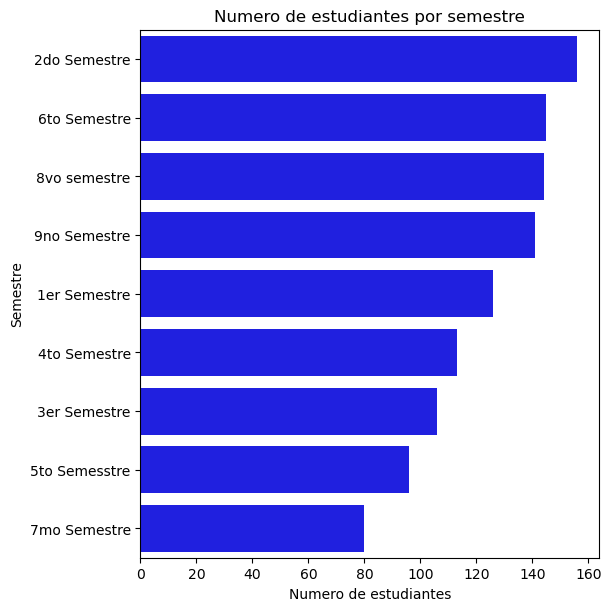

In [30]:
fig= plt.subplots(figsize=(6,6),constrained_layout=True)
ax = sns.countplot(data=DatosF,y="3",order=DatosF["3"].value_counts().index,color="b")
ax.set_yticklabels(ax.get_yticklabels(),fontsize="medium")
ax.set_title("Numero de estudiantes por semestre", fontsize= 'large')
ax.set_ylabel('Semestre')
ax.set_xlabel('Numero de estudiantes')

In [31]:
DatosF['2'].value_counts()

Contaduría publica                 403
Administración de empresas         307
Ingenieria informática             256
Seguridad y salud en el trabajo    141
Name: 2, dtype: int64

In [32]:
DatosF['7'].value_counts()

De 2 a 4 horas      445
De 4 horas o mas    368
De 1 a 2 horas      269
Ninguna              25
Name: 7, dtype: int64

In [33]:
DatosF['1'].value_counts()

Femenino     616
Masculino    489
Otro           2
Name: 1, dtype: int64

In [34]:
DatosF = DatosF.replace({"Otro":"Masculino"})

In [35]:
DatosF['1'].value_counts()

Femenino     616
Masculino    491
Name: 1, dtype: int64

In [149]:
DatosF['5'].value_counts()

No    1072
Sí      35
Name: 5, dtype: int64

In [150]:
DatosF['13'].value_counts()

Sí    797
No    310
Name: 13, dtype: int64

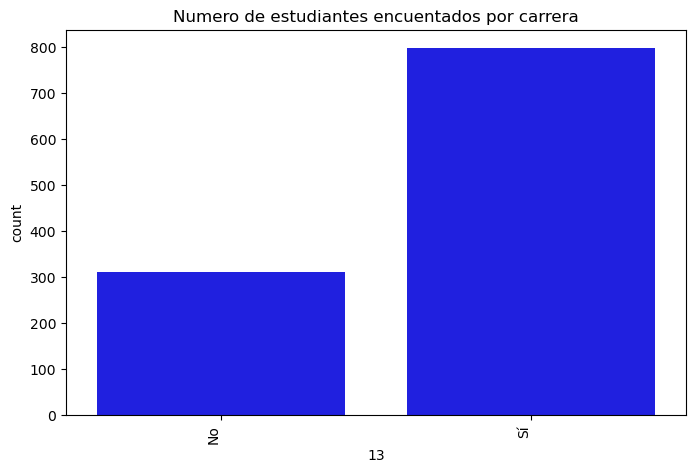

In [151]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = DatosF, x = '13',color="b")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.title('Numero de estudiantes encuentados por carrera')
plt.show()

In [152]:
DatosF['19'].value_counts()

No    1005
Sí     102
Name: 19, dtype: int64

In [153]:
DatosF['20'].value_counts()

Sí    978
No    129
Name: 20, dtype: int64

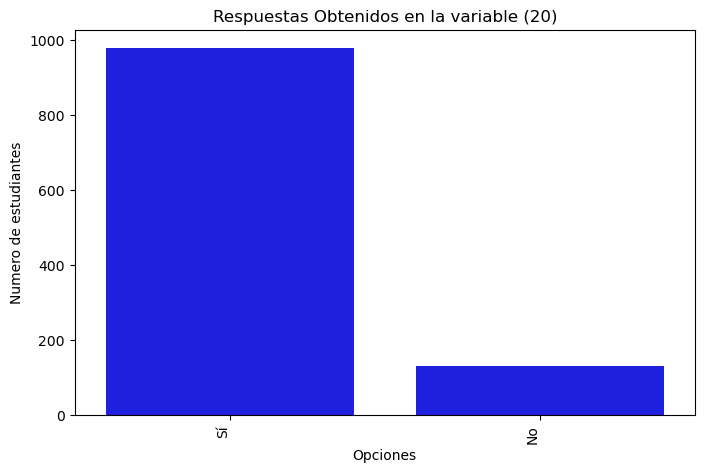

In [105]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = DatosF, x = '20',color="b")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.title('Respuestas Obtenidos en la variable (20)')
plt.xlabel('Opciones', fontsize=10)
plt.ylabel('Numero de estudiantes', fontsize=10)
plt.show()

In [106]:
DatosF['51'].value_counts()

Sí    932
No    175
Name: 51, dtype: int64

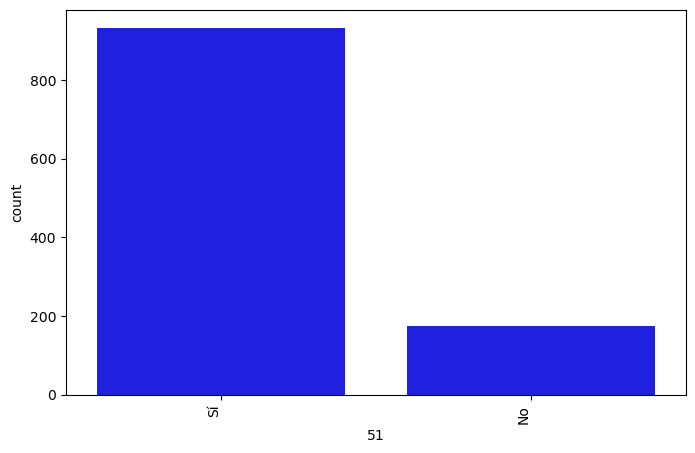

In [107]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = DatosF, x = '51',color="b")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.show()

In [108]:
DatosF['24'].value_counts()

siempre         931
regularmente    162
Casi nunca       14
Name: 24, dtype: int64

In [109]:
DatosF['29'].value_counts()

Sí       774
No       324
No/Sí      9
Name: 29, dtype: int64

In [36]:
DatosF = DatosF.replace({"No/Sí":"No"})

In [37]:
DatosF['29'].value_counts()

Sí    774
No    333
Name: 29, dtype: int64

In [38]:
DatosF['20'].value_counts()

Sí    978
No    129
Name: 20, dtype: int64

In [39]:
DatosF

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,Femenino,Administración de empresas,6to Semestre,Sí,No,Sí,De 1 a 2 horas,No,Estrato 1,Sí,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,No
1,Femenino,Contaduría publica,6to Semestre,No,No,Sí,De 2 a 4 horas,No,Estrato 2,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,No,No,Sí
2,Femenino,Contaduría publica,9no Semestre,No,No,No,De 4 horas o mas,No,Estrato 3,Sí,...,No,No,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
3,Femenino,Seguridad y salud en el trabajo,3er Semestre,No,No,Sí,De 4 horas o mas,No,Estrato 2,Sí,...,No,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,Sí
4,Masculino,Administración de empresas,5to Semesstre,No,No,Sí,De 4 horas o mas,No,Estrato 2,Sí,...,No,Sí,Sí,No,Sí,No,Sí,No,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Masculino,Administración de empresas,7mo Semestre,Sí,No,Sí,De 4 horas o mas,No,Estrato 1,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1113,Femenino,Administración de empresas,3er Semestre,Sí,No,Sí,De 4 horas o mas,No,Estrato 3,Sí,...,Sí,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí
1114,Femenino,Administración de empresas,8vo semestre,No,No,No,De 2 a 4 horas,No,Estrato 2,No,...,No,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí
1115,Femenino,Contaduría publica,2do Semestre,Sí,No,Sí,De 4 horas o mas,Sí,Estrato 3,Sí,...,No,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí


## Creacion de la variable clase

Se escogen las variables que permiten clasificar a los estudiante segun su grado de afinidad

Se definen las condiciones para determinar la etiqueta de la clase, es decir, si se clasifica en el grupo 1 y grupo 2

In [40]:
condiciones = (
    (DatosF['13'] == 'Sí') & (DatosF['19'] == 'Sí') & (DatosF['20'] == 'Sí') & (DatosF['52'] == 'Sí'),
    (DatosF['13'] == 'Sí') & (DatosF['19'] == 'Sí') & (DatosF['20'] == 'Sí') & (DatosF['52'] == 'No'),
    (DatosF['13'] == 'Sí') & (DatosF['19'] == 'Sí') & (DatosF['20'] == 'No') & (DatosF['52'] == 'No'),
    (DatosF['13'] == 'Sí') & (DatosF['19'] == 'No') & (DatosF['20'] == 'No') & (DatosF['52'] == 'No'),
    (DatosF['13'] == 'No') & (DatosF['19'] == 'No') & (DatosF['20'] == 'No') & (DatosF['52'] == 'No'),
    (DatosF['13'] == 'No') & (DatosF['19'] == 'No') & (DatosF['20'] == 'No') & (DatosF['52'] == 'Sí'),
    (DatosF['13'] == 'No') & (DatosF['19'] == 'No') & (DatosF['20'] == 'Sí') & (DatosF['52'] == 'Sí'),
    (DatosF['13'] == 'No') & (DatosF['19'] == 'Sí') & (DatosF['20'] == 'Sí') & (DatosF['52'] == 'Sí'),
    (DatosF['13'] == 'Sí') & (DatosF['19'] == 'No') & (DatosF['20'] == 'Sí') & (DatosF['52'] == 'No'),
    (DatosF['13'] == 'No') & (DatosF['19'] == 'Sí') & (DatosF['20'] == 'No') & (DatosF['52'] == 'Sí'),
    (DatosF['13'] == 'Sí') & (DatosF['19'] == 'No') & (DatosF['20'] == 'Sí') & (DatosF['52'] == 'Sí'),
    (DatosF['13'] == 'No') & (DatosF['19'] == 'Sí') & (DatosF['20'] == 'No') & (DatosF['52'] == 'No'),
    (DatosF['13'] == 'No') & (DatosF['19'] == 'Sí') & (DatosF['20'] == 'Sí') & (DatosF['52'] == 'No'),
    (DatosF['13'] == 'Sí') & (DatosF['19'] == 'No') & (DatosF['20'] == 'No') & (DatosF['52'] == 'Sí'),
    (DatosF['13'] == 'Sí') & (DatosF['19'] == 'Sí') & (DatosF['20'] == 'No') & (DatosF['52'] == 'Sí'),
    (DatosF['13'] == 'No') & (DatosF['19'] == 'No') & (DatosF['20'] == 'Sí') & (DatosF['52'] == 'No'),
)

In [41]:
resultados = ('Grado_2', 'Grado_1', 'Grado_2', 'Grado_2', 'Grado_1', 'Grado_1', 'Grado_2', 'Grado_2', 'Grado_2', 'Grado_1', 'Grado_3', 'Grado_1', 'Grado_1', 'Grado_2', 'Grado_1', 'Grado_1')

In [42]:
DatosF['clase'] = np.select(condiciones, resultados)

In [44]:
DatosF

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,clase
0,Femenino,Administración de empresas,6to Semestre,Sí,No,Sí,De 1 a 2 horas,No,Estrato 1,Sí,...,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,No,Grado_2
1,Femenino,Contaduría publica,6to Semestre,No,No,Sí,De 2 a 4 horas,No,Estrato 2,No,...,Sí,Sí,Sí,Sí,Sí,Sí,No,No,Sí,Grado_3
2,Femenino,Contaduría publica,9no Semestre,No,No,No,De 4 horas o mas,No,Estrato 3,Sí,...,No,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí,Grado_3
3,Femenino,Seguridad y salud en el trabajo,3er Semestre,No,No,Sí,De 4 horas o mas,No,Estrato 2,Sí,...,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,Sí,Grado_3
4,Masculino,Administración de empresas,5to Semesstre,No,No,Sí,De 4 horas o mas,No,Estrato 2,Sí,...,Sí,Sí,No,Sí,No,Sí,No,Sí,Sí,Grado_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Masculino,Administración de empresas,7mo Semestre,Sí,No,Sí,De 4 horas o mas,No,Estrato 1,No,...,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Grado_3
1113,Femenino,Administración de empresas,3er Semestre,Sí,No,Sí,De 4 horas o mas,No,Estrato 3,Sí,...,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Grado_3
1114,Femenino,Administración de empresas,8vo semestre,No,No,No,De 2 a 4 horas,No,Estrato 2,No,...,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí,Grado_3
1115,Femenino,Contaduría publica,2do Semestre,Sí,No,Sí,De 4 horas o mas,Sí,Estrato 3,Sí,...,Sí,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Grado_3


In [45]:
DatosF['clase'].value_counts()

Grado_3    633
Grado_2    335
Grado_1    139
Name: clase, dtype: int64

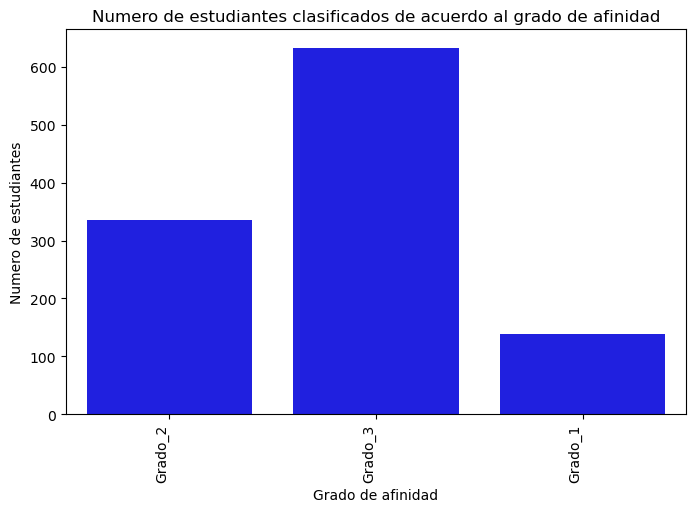

In [46]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = DatosF, x = 'clase',color="b")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.title('Numero de estudiantes clasificados de acuerdo al grado de afinidad')
plt.xlabel('Grado de afinidad', fontsize=10)
plt.ylabel('Numero de estudiantes', fontsize=10)
plt.show()

In [47]:
group = DatosF.groupby(["clase","2"])
print(group.size().reset_index(name="counts"))

      clase                                2  counts
0   Grado_1       Administración de empresas      29
1   Grado_1               Contaduría publica      60
2   Grado_1           Ingenieria informática      31
3   Grado_1  Seguridad y salud en el trabajo      19
4   Grado_2       Administración de empresas      96
5   Grado_2               Contaduría publica     122
6   Grado_2           Ingenieria informática      67
7   Grado_2  Seguridad y salud en el trabajo      50
8   Grado_3       Administración de empresas     182
9   Grado_3               Contaduría publica     221
10  Grado_3           Ingenieria informática     158
11  Grado_3  Seguridad y salud en el trabajo      72


In [48]:
group = DatosF.groupby(["clase","23"])
print(group.size().reset_index(name="counts"))

     clase       23  counts
0  Grado_1        1      10
1  Grado_1        2      44
2  Grado_1  3 o mas      85
3  Grado_2        1      13
4  Grado_2        2     105
5  Grado_2  3 o mas     217
6  Grado_3        1       9
7  Grado_3        2     152
8  Grado_3  3 o mas     472


In [49]:
data_crosstab = pd.crosstab(DatosF['clase'],
                            DatosF['3'], 
                               margins = False)
print(data_crosstab)

3        1er Semestre  2do Semestre  3er Semestre  4to Semestre  \
clase                                                             
Grado_1             9            12            14            12   
Grado_2            33            50            40            32   
Grado_3            84            94            52            69   

3        5to Semesstre  6to Semestre  7mo Semestre  8vo semestre  9no Semestre  
clase                                                                           
Grado_1             11            30             8            18            25  
Grado_2             29            35            27            45            44  
Grado_3             56            80            45            81            72  


In [50]:
data_crosstab = pd.crosstab(DatosF['clase'],
                            DatosF['13'], 
                               margins = False)
print(data_crosstab)

13        No   Sí
clase            
Grado_1  124   15
Grado_2  186  149
Grado_3    0  633


In [51]:
data_crosstab = pd.crosstab(DatosF['clase'],
                            DatosF['19'],
                               margins = False)
print(data_crosstab)

19        No  Sí
clase           
Grado_1   99  40
Grado_2  273  62
Grado_3  633   0


In [52]:
data_crosstab = pd.crosstab(DatosF['clase'],
                            DatosF['20'], 
                               margins = False)
print(data_crosstab)

20       No   Sí
clase           
Grado_1  90   49
Grado_2  39  296
Grado_3   0  633


In [203]:
data_crosstab = pd.crosstab(DatosF['clase'],
                            DatosF['52'], 
                               margins = False)
print(data_crosstab)

52       No   Sí
clase           
Grado_1  87   52
Grado_2  75  260
Grado_3   0  633


In [204]:
group = DatosF.groupby(["clase","13","20"])
print(group.size().reset_index(name="counts"))

     clase  13  20  counts
0  Grado_1  No  No      82
1  Grado_1  No  Sí      42
2  Grado_1  Sí  No       8
3  Grado_1  Sí  Sí       7
4  Grado_2  No  Sí     186
5  Grado_2  Sí  No      39
6  Grado_2  Sí  Sí     110
7  Grado_3  Sí  Sí     633


In [205]:
group = DatosF.groupby(["19","13"])
print(group.size().reset_index(name="counts"))

   19  13  counts
0  No  No     273
1  No  Sí     732
2  Sí  No      37
3  Sí  Sí      65


### Preprocesamiento del dataset y Transformaciones previas necesarias para la modelación

A continuacion, se usa pd.get_dummmies para pasar las variables categoricas a numericas (binarizarlas), asi, posteriormente los algoritmos puedan ser ejecutados. 

In [53]:
uno = pd.get_dummies(DatosF["1"], prefix="1")
dos = pd.get_dummies(DatosF["2"], prefix="2")
trece = pd.get_dummies(DatosF["13"], prefix="13")
siete = pd.get_dummies(DatosF["7"], prefix="7")
diescinueve = pd.get_dummies(DatosF["19"], prefix="19")
veinte = pd.get_dummies(DatosF["20"], prefix="20")
ciencuentaydos = pd.get_dummies(DatosF["52"], prefix="52")
tres = pd.get_dummies(DatosF["3"], prefix="3")
cuatro = pd.get_dummies(DatosF["4"], prefix="4")
cinco = pd.get_dummies(DatosF["5"], prefix="5")
seis = pd.get_dummies(DatosF["6"], prefix="6")
ocho = pd.get_dummies(DatosF["8"], prefix="8")
nueve = pd.get_dummies(DatosF["9"], prefix="9")
dies = pd.get_dummies(DatosF["10"], prefix="10")
once = pd.get_dummies(DatosF["11"], prefix="11")
doce = pd.get_dummies(DatosF["12"], prefix="12")
catorce = pd.get_dummies(DatosF["14"], prefix="14")
quince = pd.get_dummies(DatosF["15"], prefix="15")
diesiseis = pd.get_dummies(DatosF["16"], prefix="16")
diesysiete= pd.get_dummies(DatosF["17"], prefix="17")
diesyocho = pd.get_dummies(DatosF["18"], prefix="18")
veintiuno = pd.get_dummies(DatosF["21"], prefix="21")
veintidos = pd.get_dummies(DatosF["22"], prefix="22")
veintitres = pd.get_dummies(DatosF["23"], prefix="23")
veinticuatro = pd.get_dummies(DatosF["24"], prefix="24")
veinticinco = pd.get_dummies(DatosF["25"], prefix="25")
veintiseis = pd.get_dummies(DatosF["26"], prefix="26")
veintisiete = pd.get_dummies(DatosF["27"], prefix="27")
veintiocho = pd.get_dummies(DatosF["28"], prefix="28")
veintinueve = pd.get_dummies(DatosF["29"], prefix="29")
treinta = pd.get_dummies(DatosF["30"], prefix="30")
treintayuno = pd.get_dummies(DatosF["31"], prefix="31")
treintaydos = pd.get_dummies(DatosF["32"], prefix="32")
treintaytres = pd.get_dummies(DatosF["33"], prefix="33")
treintaycuatro = pd.get_dummies(DatosF["34"], prefix="34")
treintaycinco = pd.get_dummies(DatosF["35"], prefix="35")
treintayseis = pd.get_dummies(DatosF["36"], prefix="36")
treintaysiete = pd.get_dummies(DatosF["37"], prefix="37")
treintayocho = pd.get_dummies(DatosF["38"], prefix="38")
treintaynueve = pd.get_dummies(DatosF["39"], prefix="39")
cuarenta = pd.get_dummies(DatosF["40"], prefix="40")
cuarentayuno = pd.get_dummies(DatosF["41"], prefix="41")
cuarentaydos = pd.get_dummies(DatosF["42"], prefix="42")
cuarentaytres = pd.get_dummies(DatosF["43"], prefix="43")
cuarentaycuatro = pd.get_dummies(DatosF["44"], prefix="44")
cuarentaycinco = pd.get_dummies(DatosF["45"], prefix="45")
cuarentayseis = pd.get_dummies(DatosF["46"], prefix="46")
cuarentaysiete = pd.get_dummies(DatosF["47"], prefix="47")
cuarentayocho = pd.get_dummies(DatosF["48"], prefix="48")
cuarentaynueve= pd.get_dummies(DatosF["49"], prefix="49")
cincuenta = pd.get_dummies(DatosF["50"], prefix="50")
cincuentayuno = pd.get_dummies(DatosF["51"], prefix="51")
cincuentaytres = pd.get_dummies(DatosF["53"], prefix="53")
cincuentaycuatro = pd.get_dummies(DatosF["54"], prefix="54")
cincuentaycinco = pd.get_dummies(DatosF["55"], prefix="55")
cincuentayseis = pd.get_dummies(DatosF["56"], prefix="56")
cincuentaysiete = pd.get_dummies(DatosF["57"], prefix="57")
cincuentayocho = pd.get_dummies(DatosF["58"], prefix="58")

In [54]:
DatosF = pd.concat((uno, DatosF), axis=1)
DatosF = pd.concat((dos, DatosF), axis=1)
DatosF = pd.concat((trece, DatosF), axis=1)
DatosF = pd.concat((siete, DatosF), axis=1)
DatosF = pd.concat((diescinueve, DatosF), axis=1)
DatosF = pd.concat((veinte, DatosF), axis=1)
DatosF = pd.concat((ciencuentaydos, DatosF), axis=1)
DatosF = pd.concat((tres, DatosF), axis=1)
DatosF = pd.concat((cuatro, DatosF), axis=1)
DatosF = pd.concat((cinco, DatosF), axis=1)
DatosF = pd.concat((seis, DatosF), axis=1)
DatosF = pd.concat((ocho, DatosF), axis=1)
DatosF = pd.concat((nueve, DatosF), axis=1)
DatosF = pd.concat((dies, DatosF), axis=1)
DatosF = pd.concat((once, DatosF), axis=1)
DatosF = pd.concat((doce, DatosF), axis=1)
DatosF = pd.concat((catorce, DatosF), axis=1)
DatosF = pd.concat((quince, DatosF), axis=1)
DatosF = pd.concat((diesiseis, DatosF), axis=1)
DatosF = pd.concat((diesysiete, DatosF), axis=1)
DatosF = pd.concat((diesyocho, DatosF), axis=1)
DatosF = pd.concat((veintiuno, DatosF), axis=1)
DatosF = pd.concat((veintidos, DatosF), axis=1)
DatosF = pd.concat((veintitres, DatosF), axis=1)
DatosF = pd.concat((veinticuatro, DatosF), axis=1)
DatosF = pd.concat((veintiseis, DatosF), axis=1)
DatosF = pd.concat((veintisiete, DatosF), axis=1)
DatosF = pd.concat((veintiocho, DatosF), axis=1)
DatosF = pd.concat((veintinueve, DatosF), axis=1)
DatosF = pd.concat((treinta, DatosF), axis=1)
DatosF = pd.concat((treintayuno, DatosF), axis=1)
DatosF = pd.concat((treintaydos, DatosF), axis=1)
DatosF = pd.concat((treintaytres, DatosF), axis=1)
DatosF = pd.concat((treintaycuatro, DatosF), axis=1)
DatosF = pd.concat((treintaycinco, DatosF), axis=1)
DatosF = pd.concat((treintayseis, DatosF), axis=1)
DatosF = pd.concat((treintaysiete, DatosF), axis=1)
DatosF = pd.concat((treintayocho, DatosF), axis=1)
DatosF = pd.concat((treintaynueve, DatosF), axis=1)
DatosF = pd.concat((cuarenta, DatosF), axis=1)
DatosF = pd.concat((cuarentayuno, DatosF), axis=1)
DatosF = pd.concat((cuarentaydos, DatosF), axis=1)
DatosF = pd.concat((cuarentaytres, DatosF), axis=1)
DatosF = pd.concat((cuarentaycuatro, DatosF), axis=1)
DatosF = pd.concat((cuarentaycinco, DatosF), axis=1)
DatosF = pd.concat((cuarentayseis, DatosF), axis=1)
DatosF = pd.concat((cuarentaysiete, DatosF), axis=1)
DatosF = pd.concat((cuarentayocho, DatosF), axis=1)
DatosF = pd.concat((cuarentaynueve, DatosF), axis=1)
DatosF = pd.concat((cincuenta, DatosF), axis=1)
DatosF = pd.concat((cincuentayuno, DatosF), axis=1)
DatosF = pd.concat((cincuentaytres, DatosF), axis=1)
DatosF = pd.concat((cincuentaycuatro, DatosF), axis=1)
DatosF = pd.concat((cincuentaycinco, DatosF), axis=1)
DatosF = pd.concat((cincuentayseis, DatosF), axis=1)
DatosF = pd.concat((cincuentaysiete, DatosF), axis=1)
DatosF = pd.concat((cincuentayocho, DatosF), axis=1)

In [55]:
DatosF = DatosF.drop(['1','2','7','13','19','20','52','3','4','5','6','7','8','9','10','11','12','14','15','16','17','18','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36', '37', '38', '39','40','41','42','43','44','45','46','47','48','49','50','51','53','54','55','56','57','58'], axis = 1)

In [56]:
DatosF

,58_No,58_Sí,57_No,57_Sí,56_No,56_Sí,55_No,55_Sí,54_No,54_Sí,...,7_Ninguna,13_No,13_Sí,2_Administración de empresas,2_Contaduría publica,2_Ingenieria informática,2_Seguridad y salud en el trabajo,1_Femenino,1_Masculino,clase
0,1,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,Grado_2
1,0,1,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,Grado_3
2,0,1,0,1,1,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,Grado_3
3,0,1,0,1,0,1,0,1,1,0,...,0,0,1,0,0,0,1,1,0,Grado_3
4,0,1,0,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,Grado_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,0,1,0,1,0,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,Grado_3
1113,0,1,0,1,0,1,0,1,0,1,...,0,0,1,1,0,0,0,1,0,Grado_3
1114,0,1,0,1,1,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,Grado_3
1115,0,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,Grado_3


In [57]:
DatosF.columns

Index(['58_No', '58_Sí', '57_No', '57_Sí', '56_No', '56_Sí', '55_No', '55_Sí',
       '54_No', '54_Sí',
       ...
       '7_Ninguna', '13_No', '13_Sí', '2_Administración de empresas',
       '2_Contaduría publica', '2_Ingenieria informática',
       '2_Seguridad y salud en el trabajo', '1_Femenino', '1_Masculino',
       'clase'],
      dtype='object', length=131)

In [140]:
#Eliminacion de las variables criterio 
Datosf = DatosF.drop(['13_No','13_Sí','19_No','19_Sí','20_No','20_Sí','52_No','52_Sí'], axis=1)

In [141]:
Datosf

,58_No,58_Sí,57_No,57_Sí,56_No,56_Sí,55_No,55_Sí,54_No,54_Sí,...,7_De 2 a 4 horas,7_De 4 horas o mas,7_Ninguna,2_Administración de empresas,2_Contaduría publica,2_Ingenieria informática,2_Seguridad y salud en el trabajo,1_Femenino,1_Masculino,clase
0,1,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,Grado_2
1,0,1,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,Grado_3
2,0,1,0,1,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,Grado_3
3,0,1,0,1,0,1,0,1,1,0,...,0,1,0,0,0,0,1,1,0,Grado_3
4,0,1,0,1,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,Grado_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,Grado_3
1113,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,Grado_3
1114,0,1,0,1,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,Grado_3
1115,0,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,Grado_3


### División del dataset en datos de entrenamiento y datos de test

Se dividen los datos en un conjunto de entrenamiento y un conjunto de test, es decir, se separan las columnas de variables predictoras de la columna de la variable a predecir, con el fin de comprobar que tan próximas son sus predicciones a los verdaderos valores de esta variable, se tomara el 80% de los datos como entrenamiento y el 20% de test.

In [259]:
# Division de los datos train y test 
X = Datosf.iloc[:,0:122]
Y = Datosf.iloc[:,122]
X_train, x_test, Y_train, y_test = train_test_split(X, Y, train_size=0.20, random_state= 42)

In [260]:
# Creacion del modelo 
model = DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state = 42)

In [261]:
# Entrenamiento del modelo
model = model.fit(X_train, Y_train)

### Predicción y evaluación del modelo

In [262]:
pred = model.predict(x_test)

In [264]:
cmTree = confusion_matrix(y_test, pred)
cmTree

array([[ 48,  11,  56],
       [ 26,  19, 225],
       [ 22,  23, 456]], dtype=int64)

In [265]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     Grado_1       0.50      0.42      0.45       115
     Grado_2       0.36      0.07      0.12       270
     Grado_3       0.62      0.91      0.74       501

    accuracy                           0.59       886
   macro avg       0.49      0.47      0.44       886
weighted avg       0.52      0.59      0.51       886



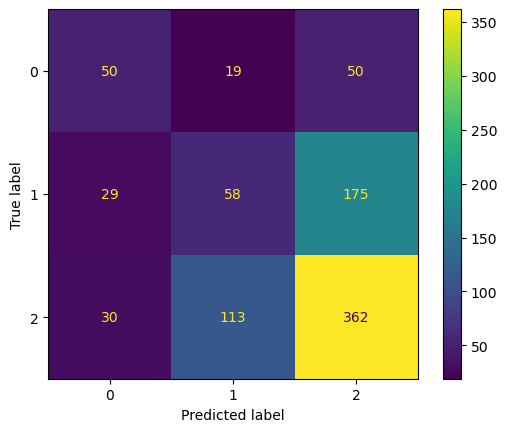

In [257]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cmTree).plot();

In [266]:
accuracy_one = accuracy_score(y_test, pred)
print("Precision modelo tree:", accuracy_one)

Precision modelo tree: 0.590293453724605


In [267]:
# Estructura del árbol creado
print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 8


In [268]:
# Vizualizacion del arbol de desicion

plt.figure(figsize=(230, 100))
plot_tree(decision_tree=model, feature_names=X.columns.values, class_names=Y.values, filled=True, fontsize=150);
plt.show()

In [277]:
# Validación cruzada k fold

modelo = DecisionTreeClassifier()
kfold_validacion = KFold(10)

In [279]:
resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.54954955 0.52252252 0.56756757 0.52252252 0.5045045  0.63963964
 0.45945946 0.50909091 0.51818182 0.47272727]


0.5265765765765766

## Random Forest

In [285]:
# Division de los datos train y test
X = Datosf.iloc[:,0:122]
Y = Datosf.iloc[:,122]
X_train, x_test, Y_train, y_test = train_test_split(X, Y, train_size=0.20, random_state=1)

In [286]:
# Creacion del modelo 
RanFor =  RandomForestClassifier(max_depth=3, random_state= 1)

In [287]:
# Entrenamiento del modelo
RanFor.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [288]:
# Predicción y evaluación del modelo
y_pred = RanFor.predict(x_test)

In [289]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6049661399548533


#### Validacion cruzada para algortimo ramdom forest

In [290]:
modelo = RandomForestClassifier()
kfold_validacion = KFold(10)

In [291]:
resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.61261261 0.6036036  0.62162162 0.61261261 0.61261261 0.66666667
 0.55855856 0.61818182 0.67272727 0.6       ]


0.6179197379197379